# **Filtros Digitais - Método das Janelas**

No método de projeto de filtros FIR por funções janela, obtém-se a resposta ao impulso de um filtro real(causal) a partir do "janelamento"(aprisionamento) da resposta ao impulso de um filtro ideal.

$$ h_{FIR}[n] = h_{ideal}[n]\cdot \underbrace{w[n]}_{\text{janela}} $$

Lembre-se que um filtro ideal é dado por:

$$ \boxed{h_{ideal}[n] = \frac{\sin(\Omega_c(n-\alpha))}{\pi (n-\alpha)}} $$

Nesse sentido, é uma boa janela para obter uma boa aproximação.

Pela propriedade da convolução, temos a seguinte relação:

$$ H_{FIR}(\omega) = \frac{1}{2 \pi} H_{ideal}(\omega) * W(\omega) $$

como queremos uma janela de comprimento finito, de amplitude igual a zero fora do intervalo [0; N], sendo simétrica com relação ao seu ponto médio.

$$ w[n] = w[N - n] $$

Logo,

$$H_{FIR}(\omega) = \frac{1}{2 \pi} H_{ideal}(\omega) * W(\omega) = \frac{1}{2 \pi} \int_{2 \pi} H_{ideal} (\theta) W(\omega - \theta) d\theta $$

## **Tipos de Janelas**
### Janela de Hanning

$$ H(n) = 0.5  \left(1 - \cos\left(\frac{2 \pi n}{N} \right) \right) $$

### Janela de Hamming

$$ H(n) = 0.54 - 0.46  \cos \left(\frac{2 \pi n}{N} \right) $$

### Janela de Blackman

$$ H(n) = 0.42 - 0.5  \cos \left(\frac{2 \pi n}{N} \right) + 0.08  \cos \left(\frac{ 4\pi n}{N} \right) $$

Onde para todas as janelas $n$ deve ser maior ou igual a zero e menor ou igual a N-1.

In [1]:
# Importando as bibliotecas padrão
import matplotlib.pyplot as plt
import numpy as np

# Definindo uma função para a janela Hanning
def hanning(N: int) -> np.ndarray:
    return 0.5 - 0.5 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

# Definindo uma função para a janela Hamming
def hamming(N:int) -> np.ndarray:
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

# Definindo uma função para a janela Blackman
def blackman(N:int) -> np.ndarray:
    return (0.42 - 0.5 * np.cos(2 * np.pi * np.arange(N) / (N - 1)) + 0.08 * np.cos(4 * np.pi * np.arange(N) / (N - 1)))


## **Visualizando as Janelas**

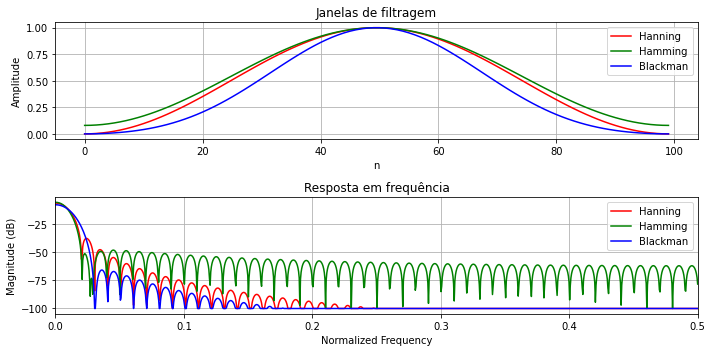

In [4]:
# Importando as bibliotecas padrão
import numpy as np
import matplotlib.pyplot as plt

# Criando as janelas de filtragem
janela_hanning = hanning(100)
janela_hamming = hamming(100)
janela_blackman = blackman(100)

# FFT das Janelas
hanning_freq = np.fft.fft(janela_hanning, 2048) / len(janela_hanning)
hamming_freq = np.fft.fft(janela_hamming, 2048) / len(janela_hamming)
blackman_freq = np.fft.fft(janela_blackman, 2048) / len(janela_blackman)

# Espectro de magnitude
mag_hanning = np.abs(np.fft.fftshift(hanning_freq))
mag_hamming = np.abs(np.fft.fftshift(hamming_freq))
mag_blackman = np.abs(np.fft.fftshift(blackman_freq))

# Normalizando o espectro de magnitude
with np.errstate(divide='ignore', invalid='ignore'):
    response_hanning = 20 * np.log10(mag_hanning)
    response_hamming = 20 * np.log10(mag_hamming)
    response_blackman = 20 * np.log10(mag_blackman)

# Clipando para excluir valores menores que 100 dB
response_hanning = np.clip(response_hanning, -100, 100)
response_hamming = np.clip(response_hamming, -100, 100)
response_blackman = np.clip(response_blackman, -100, 100)

plt.figure(1, figsize=(10, 5))
# Plotando o sinal de onda senoidal
plt.subplot(2, 1, 1)
# Plota as janelas de filtragem
plt.plot(janela_hanning, 'r-', label='Hanning')
plt.plot(janela_hamming, 'g-', label='Hamming')
plt.plot(janela_blackman, 'b-', label='Blackman')
plt.title('Janelas de filtragem')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Plotando a resposta em frequência
plt.subplot(2, 1, 2)
plt.plot(np.linspace(-.5, .5, len(response_hanning)), response_hanning, 'r-', label='Hanning')
plt.plot(np.linspace(-.5, .5, len(response_hamming)),response_hamming, 'g-', label='Hamming')
plt.plot(np.linspace(-.5, .5, len(response_blackman)),response_blackman, 'b-', label='Blackman')
plt.title('Resposta em frequência')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 0.5)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

1. O principal problema associado com a janela retangular é a presença de oscilações próximas às extremidades da faixa do filtro resultante, que são causadas pela existência de lóbulos laterais na resposta em freqüência da janela.

2. A janela de hamming concentra 99,96% de sua energia no lóbulo principal. Por isso, a faixa de transição é mais larga que da janela retangular. Em compensação, a atenuação na sua faixa de rejeição é maior que àquela da janela retangular.

3. A janela de blackman apresenta a maior atenuação na faixa de rejeição do que outras janelas. Devido a introdução do segundo termo cossenoidal, esta janela reduz ainda mais os efeitos dos lobos secundários.

![](../Imagens/Unidade3/Janelas.png)

## **Exercício Feito**:

**Suponha que gostaríamos de projetar um filro FIR passa-baixa de fase linear de acordo com as seguintes especificações:**

$$ \left\{\begin{matrix} 0.99 ≤ | H \left(e^{j\omega} \right) ≤ 1.01 & |\omega| ≤ 0.19\pi \\ | H \left(e^{j\omega} \right) ≤ 0.01 & 0.21\pi ≤ |\omega| ≤ \pi  \end{matrix} \right. $$

Em primeiro lugar, note que o filtro possui características de ser um **filtro real** e não um filtro ideal. Podemos notar isso pois existe uma faixa de transição $\omega$ de 0.19 até 0.21.

Da faixa de transição:

$$ \Omega_c = \frac{0.21\pi + 0.19\pi}{2} = 0.2\pi $$

Além disso, note que $\alpha_s = 0.01$, pois $| H \left(e^{j\omega} \right) ≤ 0.01$

$$ \alpha_s = 20 \log(0.01) = - 40 \text{ dB}$$

Consultando-se a tabela acima, note que a janela retangular não possui características que atendam a esses requistos (Stopband Attenuation menor que -40 dB). A janela de Hanning atende aos requisitos estabelecidos, pois a atenunação está no patamar de -44 decibeis. Com base na janela de hanning, podemos determinar o valor de N olhando-se a faixa de transição ("Transition Width"):

$$ \Delta \Omega = \frac{3.1 \pi}{N} \implies N = \frac{3.1 \pi }{(0.21 - 0.19)\pi} = 310 $$

e com o valor de $N$, podemos determinar o valor $\alpha$:

$$ \alpha = \frac{310}{2} = 155 $$

Finalizando-se a questão, podemos montar o filtro FIR:

$$ \begin{align*} h_{FIR}[n] &= h_{ideal}[n]\cdot w_{hanning}[n] \\ h_{FIR}[n] &= \frac{\sin(\Omega_c(n-\alpha))}{\pi (n-\alpha)} \left(0.5 - 0.5\cos\left(\frac{2 \pi n}{N} \right) \right) \\ h_{FIR}[n] &= \frac{\sin(0.2\pi(n-155))}{\pi (n-155)} \left(0.5 - 0.5\cos\left(\frac{2 \pi n}{310} \right) \right) \end{align*}$$

Finalizando-se:

$$ \boxed{h_{FIR}[n] = \frac{\sin(0.2\pi(n-155))}{\pi (n-155)} \left(0.5 - 0.5\cos\left(\frac{2 \pi n}{310} \right) \right)}$$